In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from sklearn.metrics import pairwise_distances
import pandas as pd
import scipy.stats as ss
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable

z_thresh = 4

In [12]:
def get_best_frequency_65db(cell_tuning,freqs):
    responses = cell_tuning[:,2]
    if np.all(responses == 0):
        return 55
    else:
        max_response_idx = np.argmax(responses)
    return max_response_idx

In [13]:
def get_active_cells(traces):

    # going to return a dictionary with only active cells, formatted exactly the same as traces

    d = dict.fromkeys(traces.keys())

    for cell in traces:
        if traces[cell]['active'] == True:
            d[cell] = traces[cell]
        else:
            d.pop(cell,None)

    return d

In [14]:
# Load all required files for the saline recording day

# saline_1_184 = "C:/Users/Conor/Documents/Imaging_Data/Two-Photon/Psilocybin_Project/Evoked_Cohort_Mice/ID184/11282022_GCaMP6s_ID184_saline/TSeries-11282022-0011-023/suite2p/plane0/cells.pkl"
# saline_2_184 = "C:/Users/Conor/Documents/Imaging_Data/Two-Photon/Psilocybin_Project/Evoked_Cohort_Mice/ID184/11282022_GCaMP6s_ID184_saline/TSeries-11282022-0011-025/suite2p/plane0/cells.pkl"

saline_1_186 = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID186/11242022_GCaMP6s_ID186_saline/TSeries-11222022-1228-021/suite2p/plane0/cells.pkl"
saline_2_186 = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID186/11242022_GCaMP6s_ID186_saline/TSeries-11222022-1228-022/suite2p/plane0/cells.pkl"

saline_1_237 = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID237/12082022_GCaMP6s_ID237_saline/TSeries-12082022-1143-031/suite2p/plane0/cells.pkl"
saline_2_237 = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID237/12082022_GCaMP6s_ID237_saline/TSeries-12082022-1143-032/suite2p/plane0/cells.pkl"

saline_1_239 = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID239/01132023_ID239_saline/TSeries-01122023-1243-038/suite2p/plane0/cells.pkl"
saline_2_239 = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID239/01132023_ID239_saline/TSeries-01122023-1243-039/suite2p/plane0/cells.pkl"

saline_1_251 = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID251/ID251_13012023_saline/TSeries-01122023-1243-040/suite2p/plane0/cells.pkl"
saline_2_251 = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID251/ID251_13012023_saline/TSeries-01122023-1243-041/suite2p/plane0/cells.pkl"

saline_1_269 = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID269/ID269_06032023_saline/TSeries-03062023-1216-061/suite2p/plane0/cells.pkl"
saline_2_269 = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID269/ID269_06032023_saline/TSeries-03062023-1216-062/suite2p/plane0/cells.pkl"

saline_1_276 = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID276/ID276_03032023_saline/TSeries-03032023-1447-059/suite2p/plane0/cells.pkl"
saline_2_276 = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID276/ID276_03032023_saline/TSeries-03032023-1447-060/suite2p/plane0/cells.pkl"

saline_1_473 = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID473/saline/TSeries-01142009-2331-135/suite2p/plane0/cells.pkl"
saline_2_473 = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID473/saline/TSeries-01142009-2331-136/suite2p/plane0/cells.pkl"

saline_1_474 = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID474/saline/TSeries-01142009-2331-137/suite2p/plane0/cells.pkl"
saline_2_474 = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID474/saline/TSeries-01142009-2331-138/suite2p/plane0/cells.pkl"

all_dicts_saline_1 = [saline_1_186,saline_1_237,saline_1_239,saline_1_251,saline_1_269,saline_1_276,saline_1_473,saline_1_474]
all_dicts_saline_2 = [saline_2_186,saline_2_237,saline_2_239,saline_2_251,saline_2_269,saline_2_276,saline_2_473,saline_2_474]
all_dicts_saline_1_str = ["saline_1_186","saline_1_237","saline_1_239","saline_1_251","saline_1_269","saline_1_276","saline_1_473","saline_1_474"]
all_dicts_saline_2_str =  ["saline_2_186","saline_2_237","saline_2_239","saline_2_251","saline_2_269","saline_2_276","saline_2_473","saline_2_474"]
saline_dict_1 ={}
saline_dict_2 = {}

for file in all_dicts_saline_1_str:
    saline_dict_1[file]=None

for file in all_dicts_saline_2_str:
    saline_dict_2[file] = None

zippedsaline = zip(all_dicts_saline_1, all_dicts_saline_1_str)
for k,v in zippedsaline:
    with open(k,'rb') as f:
        saline_dict_1[v] = pickle.load(f)

zippedpsilo = zip(all_dicts_saline_2, all_dicts_saline_2_str)
for k,v in zippedpsilo:
    with open(k,'rb') as f:
        saline_dict_2[v] = pickle.load(f)


In [15]:
print(saline_dict_1['saline_1_251'][1]['matched_cells'])

[[   1    2]
 [   3   10]
 [   7   88]
 [  10    9]
 [  11   99]
 [  12   33]
 [  13   12]
 [  14   77]
 [  15   35]
 [  16    6]
 [  17   49]
 [  20   15]
 [  21   57]
 [  22   29]
 [  24  178]
 [  30   50]
 [  33  137]
 [  34   21]
 [  35  104]
 [  36   75]
 [  38   39]
 [  39  108]
 [  41  119]
 [  42  106]
 [  43  223]
 [  45  214]
 [  46   94]
 [  47   96]
 [  48  121]
 [  51   51]
 [  54  111]
 [  55   32]
 [  56  335]
 [  58   22]
 [  60   67]
 [  64   71]
 [  66  105]
 [  67   38]
 [  68   53]
 [  69    7]
 [  70  289]
 [  71   68]
 [  72   24]
 [  73   90]
 [  74  141]
 [  75  118]
 [  76  441]
 [  77   20]
 [  78   48]
 [  79   34]
 [  80  283]
 [  81  150]
 [  82   85]
 [  84   59]
 [  85  116]
 [  86  157]
 [  87   84]
 [  90  144]
 [  91   87]
 [  92   89]
 [  94  140]
 [  97   58]
 [  98  159]
 [ 100   55]
 [ 102  278]
 [ 103   23]
 [ 105   98]
 [ 106   36]
 [ 107  231]
 [ 108   52]
 [ 109   47]
 [ 110  196]
 [ 114  147]
 [ 116   69]
 [ 118   74]
 [ 119   44]
 [ 120  225]

In [16]:

cell_list_1 = list(saline_dict_1[all_dicts_saline_1_str[0]].keys())
dict_keys = list(saline_dict_1.keys())

nfreq = list(saline_dict_1[all_dicts_saline_1_str[0]][cell_list_1[0]]['traces'].keys())
nInt = list(saline_dict_1[all_dicts_saline_1_str[0]][cell_list_1[0]]['traces'][nfreq[0]].keys())
ntrial = list(saline_dict_1[all_dicts_saline_1_str[0]][cell_list_1[0]]['traces'][nfreq[0]][nInt[0]].keys())
# nfreq.insert(0, 12)
print(nfreq, nInt, ntrial)
print(dict_keys)

[4364, 5371, 6612, 8140, 10020, 12335, 15184, 18691, 23009, 28324, 34867, 42922] [35, 50, 65, 80] [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
['saline_1_186', 'saline_1_237', 'saline_1_239', 'saline_1_251', 'saline_1_269', 'saline_1_276', 'saline_1_473', 'saline_1_474']


In [17]:
print(saline_dict_1.keys())

dict_keys(['saline_1_186', 'saline_1_237', 'saline_1_239', 'saline_1_251', 'saline_1_269', 'saline_1_276', 'saline_1_473', 'saline_1_474'])


In [88]:
sensitivity_saline_1 = []
for dict in saline_dict_1:
    cell_list = list(saline_dict_1[dict].keys())
    for cell in cell_list:
        tuning_array = np.array(saline_dict_1[dict][cell]['peak_tuning'])
        for j in range(len(nInt)):
            if any(y > z_thresh for y in tuning_array[0:,j]):
                sensitivity_saline_1.append(float(j))
                break
            else:
                continue

In [89]:
sensitivity_saline_2 = []
counter = 0
for dict in saline_dict_2:
    cell_list = list(saline_dict_2[dict].keys())
    for cell in cell_list:
        tuning_array = np.array(saline_dict_2[dict][cell]['peak_tuning'])
        for j in range(len(nInt)):
            if any(y > z_thresh for y in tuning_array[0:,j]):
                sensitivity_saline_2.append(float(j))
                break
            else:
                continue

In [90]:
print(len(sensitivity_saline_1))
print(len(sensitivity_saline_2))

1939
1609


In [91]:
def ecdf(a):
    x, counts = np.unique(a, return_counts=True)
    cusum = np.cumsum(counts)
    return x, cusum / cusum[-1]

array_saline_1 = ecdf(sensitivity_saline_1)
print(array_saline_1[1])

array_saline_2 = ecdf(sensitivity_saline_2)
print(array_saline_2[1])


[0.35997937 0.59927798 0.8406395  1.        ]
[0.32193909 0.56494717 0.82846489 1.        ]


In [92]:
def plot_cdf(data):
    # Define your series
    s = pd.Series(data, name = 'value')
    df = pd.DataFrame(s)
    # Get the frequency, PDF and CDF for each value in the series

    # Frequency
    stats_df = df \
    .groupby('value') \
    ['value'] \
    .agg('count') \
    .pipe(pd.DataFrame) \
    .rename(columns = {'value': 'frequency'})

    # PDF
    stats_df['pdf'] = stats_df['frequency'] / sum(stats_df['frequency'])

    # CDF
    stats_df['cdf'] = stats_df['pdf'].cumsum()
    stats_df = stats_df.reset_index()
    stats_df

    return stats_df

    

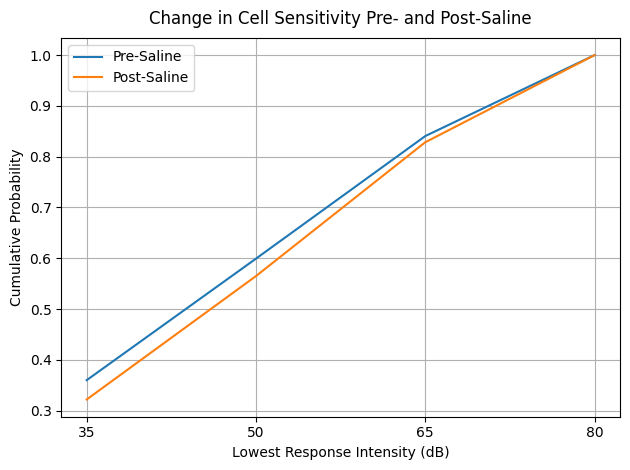

In [93]:
saline_1 = plot_cdf(sensitivity_saline_1)
saline_2 = plot_cdf(sensitivity_saline_2)

label = ["Pre-Saline","Post-Saline"]

zipped = zip([saline_1,saline_2], label)

fig = plt.figure()

for frame,label in zipped:
    plt.plot(frame['value'], frame['cdf'],label = label )
plt.title("Change in Cell Sensitivity Pre- and Post-Saline",pad=10)
plt.xticks(range(len(nInt)), nInt)
plt.xlabel("Lowest Response Intensity (dB)")
plt.ylabel("Cumulative Probability")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

In [137]:
filepath = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/"

np.save(filepath + 'sensitivity_pre_saline', sensitivity_saline_1)

In [24]:
# # Save the megadicts
# BASE_PATH = "C:/Users/Conor/Documents/Imaging_Data/Two-Photon/Psilocybin_Project/Evoked_Cohort_Mice/Megadicts/"

# # save the recording information 
# with open(BASE_PATH+"saline_pre_dict.pkl",'wb') as f:
#         pickle.dump(saline_dict_1,f)

# with open(BASE_PATH+"saline_post_dict.pkl",'wb') as f:
#         pickle.dump(saline_dict_2,f)

In [25]:
BF_65_saline_1 = []
mean_peak_amplitude_1 = []
for dict in saline_dict_1:
    cell_list = list(saline_dict_1[dict].keys())
    for cell in cell_list:
        BF = get_best_frequency_65db(saline_dict_1[dict][cell]['tuning'],nfreq)
        BF_65_saline_1.append(BF)

        if BF != 55:

            tuning_array = saline_dict_1[dict][cell]['tuning']
            amplitude = tuning_array[BF,2]
            mean_peak_amplitude_1.append(amplitude)
            


# print(BF_65_saline_1)
# print(mean_peak_amplitude_1)

# Error is that it's importing the dictionary as a string instead of a dictionary. 


0.35037191529161554
1.636070484136677
0.02624862136019712


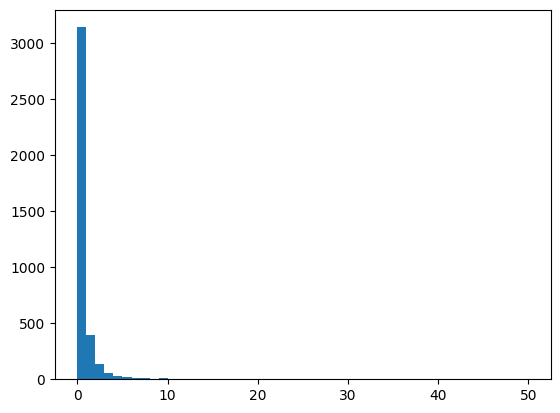

In [26]:
max_value = 50
plt.hist(mean_peak_amplitude_1,bins=range(int(min(mean_peak_amplitude_1)), max_value + 1))

print(np.median(mean_peak_amplitude_1))
print(np.std(mean_peak_amplitude_1))
print(ss.sem(mean_peak_amplitude_1))

In [27]:
BF_65_saline_2 = []
mean_peak_amplitude_2= []
for dict in saline_dict_2:
    cell_list = list(saline_dict_2[dict].keys())
    for cell in cell_list:
        BF = get_best_frequency_65db(saline_dict_2[dict][cell]['tuning'],nfreq)
        BF_65_saline_2.append(BF)

        if BF != 55:

            tuning_array = saline_dict_2[dict][cell]['tuning']
            amplitude = tuning_array[BF,2]
            mean_peak_amplitude_2.append(amplitude)
            


print(BF_65_saline_2)
print(mean_peak_amplitude_2)

print(np.mean(mean_peak_amplitude_2))

[1, 3, 5, 10, 8, 9, 6, 0, 11, 6, 8, 6, 6, 6, 6, 4, 5, 0, 7, 2, 5, 6, 4, 8, 4, 0, 0, 10, 4, 0, 11, 4, 9, 7, 4, 9, 9, 11, 2, 2, 1, 0, 2, 5, 7, 3, 11, 7, 8, 1, 6, 11, 7, 0, 2, 5, 7, 4, 5, 7, 0, 7, 8, 11, 0, 1, 9, 4, 8, 1, 5, 9, 6, 6, 6, 3, 11, 5, 4, 6, 11, 8, 3, 0, 7, 0, 1, 7, 4, 0, 4, 8, 7, 7, 3, 0, 7, 2, 1, 5, 2, 8, 0, 0, 5, 0, 11, 9, 0, 7, 8, 1, 4, 3, 6, 11, 0, 7, 7, 4, 2, 8, 2, 0, 10, 0, 2, 11, 6, 5, 4, 0, 0, 11, 10, 2, 6, 3, 3, 5, 10, 8, 0, 9, 11, 8, 7, 4, 11, 11, 6, 7, 3, 9, 10, 11, 7, 8, 11, 0, 7, 0, 8, 1, 0, 4, 9, 0, 2, 11, 0, 8, 10, 1, 4, 9, 9, 11, 9, 0, 3, 4, 11, 0, 9, 11, 1, 0, 9, 6, 6, 5, 10, 9, 2, 4, 8, 5, 4, 11, 5, 3, 7, 2, 6, 3, 0, 0, 6, 0, 11, 5, 0, 10, 3, 4, 2, 0, 0, 0, 0, 1, 8, 2, 7, 3, 4, 4, 11, 5, 7, 5, 6, 2, 0, 2, 6, 0, 5, 2, 11, 11, 11, 10, 0, 2, 0, 7, 0, 5, 5, 9, 11, 1, 5, 11, 2, 4, 5, 2, 10, 2, 8, 0, 0, 0, 9, 1, 5, 10, 11, 1, 0, 1, 11, 9, 6, 1, 1, 0, 11, 7, 4, 10, 6, 3, 2, 0, 3, 5, 0, 7, 0, 6, 5, 9, 1, 3, 1, 4, 6, 10, 5, 7, 1, 11, 4, 0, 2, 2, 1, 6, 7, 9, 2, 4, 0, 9

0.3236702096262775
1.5784228370970474
0.026336326144635838


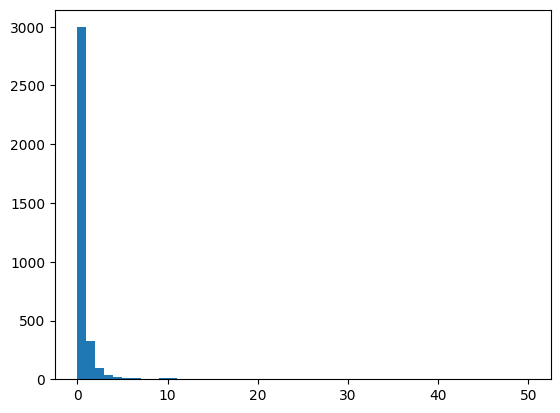

In [28]:
max_value = 50
plt.hist(mean_peak_amplitude_2,bins=range(int(min(mean_peak_amplitude_2)), max_value + 1))

print(np.median(mean_peak_amplitude_2))
print(np.std(mean_peak_amplitude_2))
print(ss.sem(mean_peak_amplitude_2))

In [29]:
ss.ttest_ind(mean_peak_amplitude_1,mean_peak_amplitude_2)

Ttest_indResult(statistic=1.9705911476524491, pvalue=0.04880749387311137)

In [30]:
df_percent_active = pd.DataFrame(columns=['Pre-Saline','Post-Saline'])

pre = pd.DataFrame(mean_peak_amplitude_1)
post = pd.DataFrame(mean_peak_amplitude_2)

df_percent_active['Pre-Saline'] = pre
df_percent_active['Post-Saline'] = post

C:\Users\Conor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


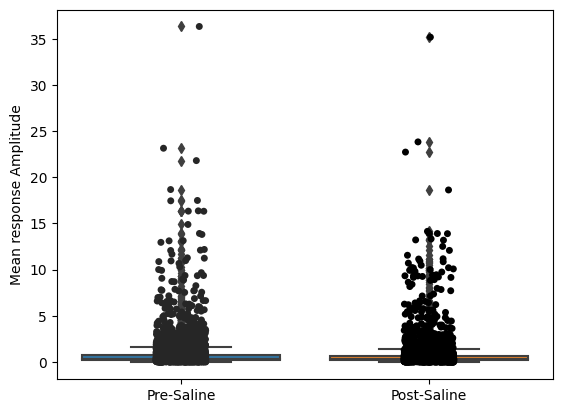

In [31]:
ax = sns.boxplot(data=df_percent_active),
sns.stripplot(data=df_percent_active,color='black')
plt.ylabel("Mean response Amplitude")

plt.show()

In [116]:
# Get the best ampltidue across all intensities, not just 65 dB.

mean_peak_amplitude_all_int_1 = []

for dict in saline_dict_1:
    cell_list = list(saline_dict_1[dict].keys())
    for cell in cell_list:
        tuning_array = saline_dict_1[dict][cell]['peak_tuning']
        amplitude = np.amax(tuning_array)
        if amplitude > z_thresh:
            mean_peak_amplitude_all_int_1.append(amplitude)

print(len(mean_peak_amplitude_all_int_1))


1939


7.489082720598138
14.178838417289143
0.32208000696933614


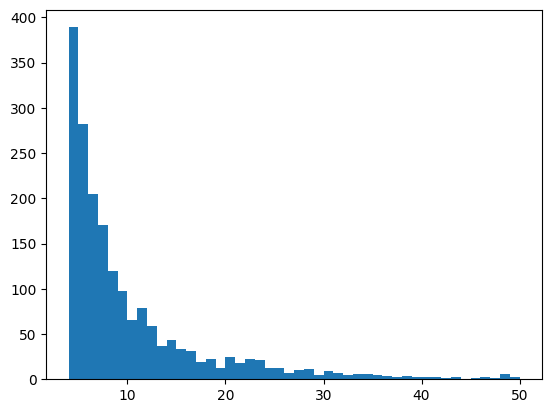

In [117]:
max_value = 50
plt.hist(mean_peak_amplitude_all_int_1,bins=range(int(min(mean_peak_amplitude_all_int_1)), max_value + 1))

print(np.median(mean_peak_amplitude_all_int_1))
print(np.std(mean_peak_amplitude_all_int_1))
print(ss.sem(mean_peak_amplitude_all_int_1))

In [118]:
# Get the best ampltidue across all intensities, not just 65 dB.

mean_peak_amplitude_all_int_2 = []

for dict in saline_dict_2:
    cell_list = list(saline_dict_2[dict].keys())
    for cell in cell_list:
        tuning_array = saline_dict_2[dict][cell]['peak_tuning']
        amplitude = np.amax(tuning_array)
        if amplitude > z_thresh:
            mean_peak_amplitude_all_int_2.append(amplitude)

print(len(mean_peak_amplitude_all_int_2))

1609


7.042948597293231
14.764577509429117
0.36819509773350817


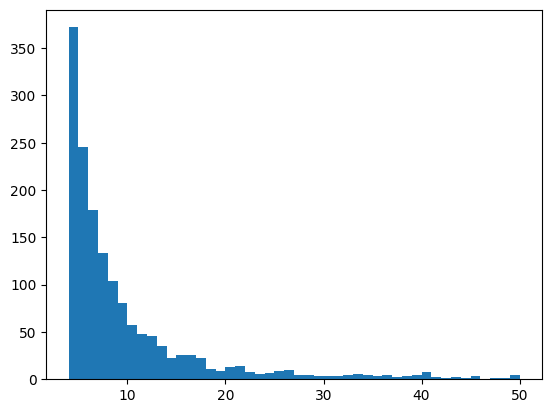

In [119]:
max_value = 50
plt.hist(mean_peak_amplitude_all_int_2,bins=range(int(min(mean_peak_amplitude_all_int_2)), max_value + 1))

print(np.median(mean_peak_amplitude_all_int_2))
print(np.std(mean_peak_amplitude_all_int_2))
print(ss.sem(mean_peak_amplitude_all_int_2))

In [120]:
df_amplitude_all_int = pd.DataFrame(columns=['Pre-Saline','Post-Saline'])

pre = pd.DataFrame(mean_peak_amplitude_all_int_1)
post = pd.DataFrame(mean_peak_amplitude_all_int_2)

df_amplitude_all_int['Pre-Saline'] = pre
df_amplitude_all_int['Post-Saline'] = post

C:\Users\Conor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


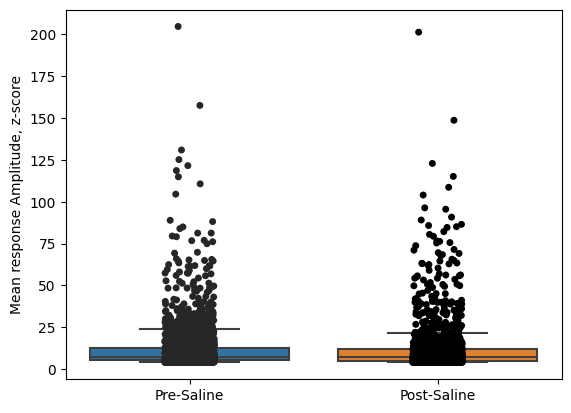

In [121]:
ax = sns.boxplot(data=df_amplitude_all_int,showfliers=False),
sns.stripplot(data=df_amplitude_all_int,color='black')
plt.ylabel("Mean response Amplitude, z-score")
# plt.ylim(0, 35)

plt.show()

In [122]:
ss.ttest_ind(mean_peak_amplitude_all_int_1,mean_peak_amplitude_all_int_2)
# P value = 0.015

Ttest_indResult(statistic=0.5771938764479145, pvalue=0.5638451352635077)

In [123]:
from scipy.stats import mannwhitneyu

statistic, p_value = mannwhitneyu(mean_peak_amplitude_all_int_1, mean_peak_amplitude_all_int_2)

print(f"Mann-Whitney U statistic: {statistic}")
print(f"P-value: {p_value}")

Mann-Whitney U statistic: 1645138.0
P-value: 0.005027768333101811


In [40]:
mean_peak_amplitude_matched_cells_1 = []

for dict in saline_dict_1:
    dictionary = saline_dict_1[dict]
    cell_list = list(saline_dict_1[dict].keys())
    matched_cells = np.array(dictionary[1]['matched_cells'])
    for cell in cell_list:
        if cell in matched_cells[:,1]:
            tuning_array = saline_dict_1[dict][cell]['tuning']
            amplitude = np.amax(tuning_array)
            if amplitude > z_thresh:
                mean_peak_amplitude_matched_cells_1.append(amplitude)

In [41]:
mean_peak_amplitude_matched_cells_2 = []

for dict in saline_dict_2:
    dictionary = saline_dict_2[dict]
    cell_list = list(saline_dict_2[dict].keys())
    matched_cells = np.array(dictionary[cell_list[0]]['matched_cells'])
    for cell in cell_list:
        if cell in matched_cells[:,0]:
            tuning_array = saline_dict_2[dict][cell]['tuning']
            amplitude = np.amax(tuning_array)
            if amplitude > z_thresh:
                mean_peak_amplitude_matched_cells_2.append(amplitude)

In [42]:
print(np.mean(mean_peak_amplitude_matched_cells_1))
print(np.std(mean_peak_amplitude_matched_cells_1))
print(ss.sem(mean_peak_amplitude_matched_cells_1))

8.652101188462636
4.901288804403725
0.5900458339378722


In [43]:
print(np.mean(mean_peak_amplitude_matched_cells_2))
print(np.std(mean_peak_amplitude_matched_cells_2))
print(ss.sem(mean_peak_amplitude_matched_cells_2))

8.507668897502416
4.40634661595776
0.6294780879939657


In [94]:
amplitude_array_all = []

In [110]:
# Create an array that's matched_cells_all
matched_responsive_186_1 = []
matched_responsive_186_2 = []
matched_186_2 = []

PRE = 'saline_1_474'
POST = 'saline_2_474'

matched_cells = saline_dict_1[PRE][1]['matched_cells']

for cell in saline_dict_1[PRE]:
    if cell in matched_cells[:,0] and saline_dict_1[PRE][cell]['active'] == True:
        matched_responsive_186_1.append(cell)

for cell in saline_dict_2[POST]:
    if cell in matched_cells[:,1] and saline_dict_2[POST][cell]['active'] == True:
        matched_responsive_186_2.append(cell)

# print(matched_responsive_186_1)
# print(matched_responsive_186_2)

indices = np.where(np.isin(matched_cells[:, 0], matched_responsive_186_1))

# Extract the corresponding values from the second column
corresponding_2 = matched_cells[indices, 1]

# Find the indices where the values in column 1 appear in 'sublist_col1'
indices_col1 = np.isin(matched_cells[:, 0], matched_responsive_186_1)

# Find the indices where the values in column 2 appear in 'sublist_col2'
indices_col2 = np.isin(matched_cells[:, 1], matched_responsive_186_2)

# Combine the two conditions using logical AND
combined_indices = np.logical_and(indices_col1, indices_col2)

# Extract the rows where both conditions are true
coactive = matched_cells[combined_indices]

# print(coactive)

amplitude_array = np.zeros_like(coactive,dtype=float)

for i, cell_1, cell_2 in zip(range(len(coactive)),coactive[:,0],coactive[:,1]):
    tuning_array_1 = saline_dict_1[PRE][cell_1]['peak_tuning']
    amplitude_1 = np.amax(tuning_array_1)
   
    amplitude_array[i,0] = amplitude_1
    
    tuning_array_2 = saline_dict_2[POST][cell_2]['peak_tuning']
    amplitude_2 = np.amax(tuning_array_2)
    amplitude_array[i,1] = amplitude_2
    
mean_amp_1 = np.mean(amplitude_array[:,0])
mean_amp_2 = np.mean(amplitude_array[:,1])
print("mean 1 is",mean_amp_1)
print("mean 2 is",mean_amp_2) 



median_amp_1 = np.median(amplitude_array[:,0])
median_amp_2 = np.median(amplitude_array[:,1])
print("median 1 is",median_amp_1)
print("median 2 is",median_amp_2) 


amplitude_array_all.append(amplitude_array)

mean 1 is 10.442287771724232
mean 2 is 11.150506571897695
median 1 is 5.742931277790676
median 2 is 6.096579588190044


In [111]:
amplitude_array_all_con = np.concatenate(amplitude_array_all,axis=0)
print(len(amplitude_array_all_con))

237


In [114]:
print(np.mean(amplitude_array_all_con[:,0]))
print(np.mean(amplitude_array_all_con[:,1]))

18.794329116659945
17.73147855570985


In [68]:
relative_diff = (amplitude_array_all_con[:,1]-amplitude_array_all_con[:,0])/amplitude_array_all_con[:,0] * 100
print(np.mean(relative_diff))



16.066365176762027


In [ ]:
# # Plots the tuning of the cell in both recordings against one another. 

# # Create a 2-panel figure with a shared colorbar
# fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# # Plot the first array in the first subplot
# im1 = axs[0].imshow(saline_dict_1['saline_1_239'][140]['tuning'], cmap='viridis')
# axs[0].set_title('Pre')


# # Plot the second array in the second subplot
# im2 = axs[1].imshow(saline_dict_2['saline_2_239'][349]['tuning'], cmap='viridis')
# axs[1].set_title('Post')


# # Add a colorbar to the right of the subplots
# divider = make_axes_locatable(axs[1])
# cax = divider.append_axes("right", size="5%", pad=0.1)
# cbar = plt.colorbar(im2, cax=cax)
# cbar.set_label('Colorbar Label')  # Replace with your desired label

# # Adjust layout for better spacing
# plt.tight_layout()

# # Show the plot
# plt.show()

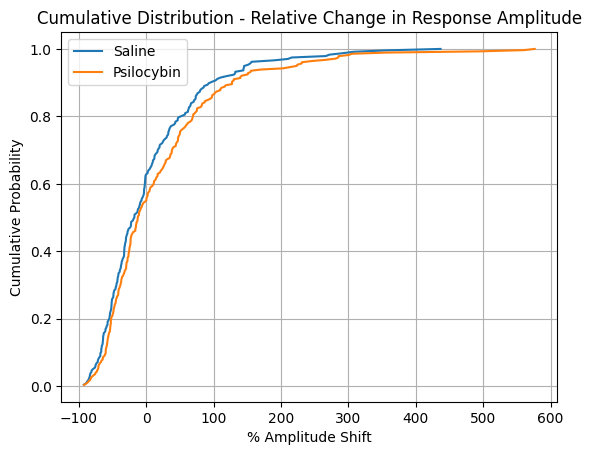

In [81]:
# Compute the empirical CDFs
sorted_data1 = np.sort(saline_diff_6dev)
sorted_data2 = np.sort(psilo_diff_6dev)
cdf1 = np.arange(1, len(sorted_data1) + 1) / len(sorted_data1)
cdf2 = np.arange(1, len(sorted_data2) + 1) / len(sorted_data2)

# Plot the CDFs
plt.plot(sorted_data1, cdf1, label='Saline')
plt.plot(sorted_data2, cdf2, label='Psilocybin')

# Add labels and legend
plt.xlabel('% Amplitude Shift')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution - Relative Change in Response Amplitude')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()